# Trabajo Práctico 1 : Reservas de Hotel

## Librerias

Importamos las librerias que vamos a necesitar en el transcurso del trabajo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 200)

## Preparacion del dataset

Primero comenzamos por abrir el csv para guardarlo como un dataframe cargandolo desde el drive adjunto.

In [3]:
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1tjlunFxE63XIpYjWk8SPm2XPxixu8SW4&export=download&authuser=0&confirm=t&uuid=d2f8a703-512a-4224-bfa6-9f3daa5d2aef&at=APZUnTUkbSGIPwu8l4wn_CFsuRO3:1693853761692')

Como podemos observar, el dataset esta conformado por 61913 filas y 31 columnas. Por lo tanto, tenemos un total de 61913 reservas hechas para poder analizar donde cada una en el mejor de los casos tiene 31 campos con informacion.

In [4]:
df.shape

(61913, 31)

Con esto podemos ver lo mencionado anteriormente, y ademas, ya podemos observar celdas donde no hay informacion guarda (valores nulos).

In [5]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Con esto podemos observar todas las variables de nuestro dataset junto a su respectivo tipo de dato, el cual puede darnos una idea de como categorizar cada una de las mismas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [7]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

Gracias a esto y sumado al paper el cual contiene mas informacion respecto a las columnas, podemos ir categorizando cada variable segun su tipo.
Esto es importante ya que podemos analizar cada variable dependiendo de su grupo, ya que no todas deben ser tratadas de la misma manera.

In [8]:
nuevas_columnas = {
    'arrival_date_year' : 'year',
    'arrival_date_month' : 'month',
    'arrival_date_week_number' : 'week_number',
    'arrival_date_day_of_month' : 'day_of_month',
    'meal' : 'meal_type',
    'agent' : 'agent_id',
    'adr' : 'average_daily_rate'
}
df.rename(columns = nuevas_columnas, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   year                            61913 non-null  int64  
 3   month                           61913 non-null  object 
 4   week_number                     61913 non-null  int64  
 5   day_of_month                    61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal_type                       61913 non-null  object 
 12  country                         

Decidimos cambiar el nombre de algunas variables ya que alguna de sus partes eran medio redundantes y otras no expresaban el contexto total de la variable.
Con el info de abajo podemos verificar que los nombres se cambiaron correctamente.

### Analisis de las variables

| Nombre de Variable               | Tipo de Variable         |
|---------------------------------|-------------------------|
| hotel                           | Cualitativa             |
| meal_type                       | Cualitativa             |
| country                         | Cualitativa             |
| market_segment                  | Cualitativa             |
| distribution_channel            | Cualitativa             |
| reserved_room_type              | Cualitativa             |
| assigned_room_type              | Cualitativa             |
| deposit_type                    | Cualitativa             |
| agent_id                        | Cualitativa             |
| company                         | Cualitativa             |
| customer_type                   | Cualitativa             |
| id                              | Cualitativa             |
| is_canceled                     | Cualitativa             |
| is_repeated_guest               | Cualitativa             |
| month                           | Cuasicuantitativa       |
| lead_time                       | Cuantitativa Discreta   |
| year                            | Cuantitativa Discreta   |
| week_number                     | Cuantitativa Discreta   |
| day_of_month                    | Cuantitativa Discreta   |
| stays_in_weekend_nights         | Cuantitativa Discreta   |
| stays_in_week_nights            | Cuantitativa Discreta   |
| adults                          | Cuantitativa Discreta   |
| children                        | Cuantitativa Discreta   |
| babies                          | Cuantitativa Discreta   |
| previous_cancellations          | Cuantitativa Discreta   |
| previous_bookings_not_canceled  | Cuantitativa Discreta   |
| booking_changes                 | Cuantitativa Discreta   |
| days_in_waiting_list            | Cuantitativa Discreta   |
| required_car_parking_spaces     | Cuantitativa Discreta   |
| total_of_special_requests       | Cuantitativa Discreta   |
| average_daily_rate              | Cuantitativa Continua    |


#### Cuantitativas


A continuacion, podemos observar el analisis de todas las variables que conforman nuestro grupo de cuantitativas discretas y continuas.
Dentro de este analisis estan se encuentran:
- cantidad
- media
- desvio estandar
- minimo
- primer cuartil
- mediana
- tercer cuartil
- maximo


In [10]:
df[['lead_time',
 'year',
 'week_number',
 'day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'average_daily_rate'
 ]].describe()

,lead_time,year,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,average_daily_rate
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,0.049957,0.523703,102.383773
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,0.221023,0.775412,47.757640
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,126.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,8.000000,5.000000,510.000000


Este resumen nos provee una enorme cantidad de informacion respecto a la distribucion de los datos, y nos permite ver si existen outliers o no. Un ejemplo de esto es la variable stays_in_week_nights, la cual su valor maximo es de 40 dias (aprox dos meses) mientras que su tercer cuartil es tan solo de 3 dias, esta enorme diferencia nos indica que existen outliers en esta variable.

##### lead_time

A continuacion, hacemos dos graficos para analizar la distribucion de la variable.

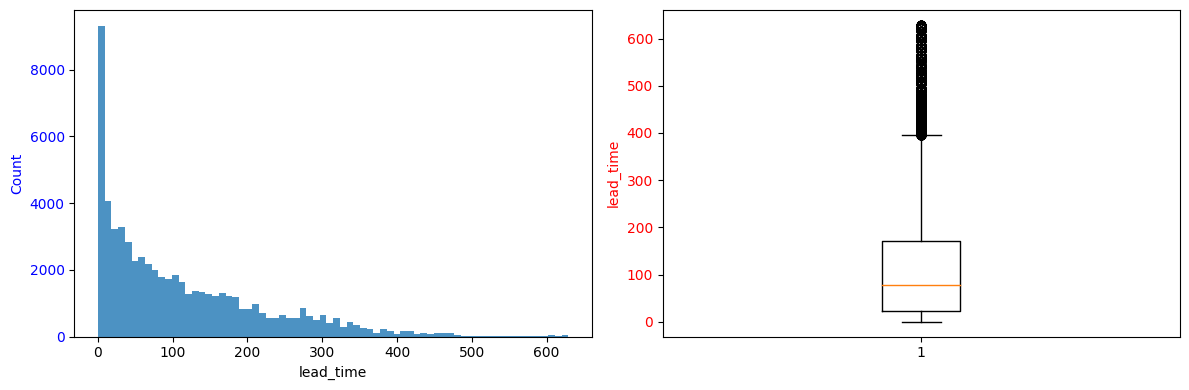

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['lead_time'], bins = 70 , alpha = 0.8)
ax1.set_xlabel('lead_time')
ax1.set_ylabel('Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2.boxplot(df['lead_time'])
ax2.set_ylabel('lead_time', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.tight_layout()
plt.show()

Como se puede observar en el grafico, notamos que las reservas se predisponen a hacer con poca antelacion, mas cercana sobre la fecha de arribo al hotel. Ademas, podemos ver que la mayoria de los datos del dataset estan dentro del rango intercuartil aproximado entre 25 y 180, tal como podemos ver en los cuartiles del boxplot.

##### year

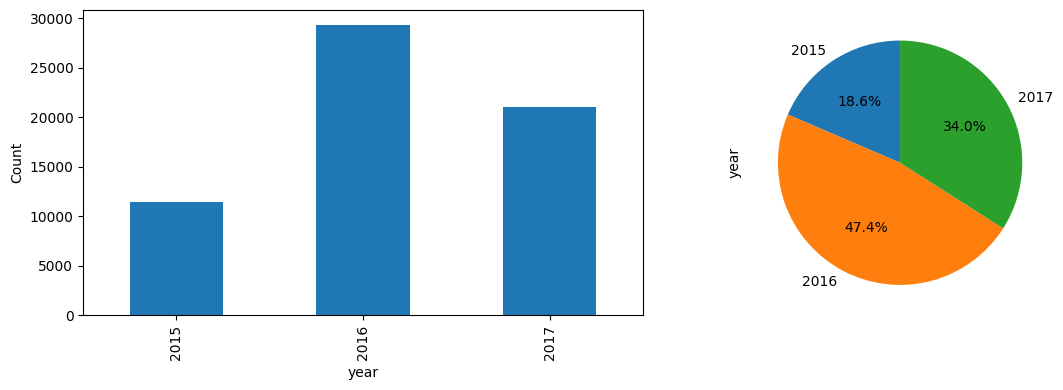

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

conteo_years = df['year'].value_counts().sort_index()

conteo_years.plot(kind='bar', ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('cantidad')

conteo_years2 = df['year'].value_counts().sort_index().reset_index()
conteo_years2.columns = ['categoria','cantidad']

ax2.pie(conteo_years2['cantidad'], labels=conteo_years2['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('year')


plt.tight_layout()
plt.show()

Como nos indica el grafico, el dataset solo contiene registros de los años 2015, 2016 y 2017, siendo el año predominante el 2016.

#### Cualitativas

Por otro lado, con las variables cualitativas analizamos los diversos valores que pueden tomar, junto con la frecuencia que tomo cada valor y su respectivo porcentaje del total.

In [32]:
columnas_cualitativas = df[[
  "hotel",
  "meal_type",
  "country",
  "market_segment",
  "distribution_channel",
  "reserved_room_type",
  "assigned_room_type",
  "deposit_type",
  "agent_id",
  "company",
  "customer_type",
  "is_canceled",
  "is_repeated_guest"
]]

tablas_de_frecuencia = {}

for columna in columnas_cualitativas.columns:
    frecuencia = df[columna].value_counts().reset_index()
    frecuencia.columns = ['Categoría', 'Frecuencia']
    frecuencia['Porcentaje'] = round(frecuencia['Frecuencia'] / df[columna].count() * 100, 2)
    tablas_de_frecuencia[columna] = frecuencia

for columna, tabla in tablas_de_frecuencia.items():
    print(f"Tabla de Frecuencias para '{columna}':")
    display(tabla)
    print("\n")

Tabla de Frecuencias para 'hotel':


,Categoría,Frecuencia,Porcentaje
0,City Hotel,42129,68.05
1,Resort Hotel,19784,31.95




Tabla de Frecuencias para 'meal_type':


,Categoría,Frecuencia,Porcentaje
0,BB,47837,77.26
1,HB,7452,12.04
2,SC,5556,8.97
3,Undefined,591,0.95
4,FB,477,0.77




Tabla de Frecuencias para 'country':


,Categoría,Frecuencia,Porcentaje
0,PRT,27950,45.31
1,GBR,5733,9.29
2,FRA,4809,7.80
3,ESP,4210,6.82
4,DEU,3312,5.37
...,...,...,...
144,HND,1,0.00
145,FJI,1,0.00
146,LIE,1,0.00
147,ATA,1,0.00




Tabla de Frecuencias para 'market_segment':


,Categoría,Frecuencia,Porcentaje
0,Online TA,29269,47.27
1,Offline TA/TO,12384,20.00
2,Groups,11545,18.65
3,Direct,5757,9.30
4,Corporate,2484,4.01
5,Complementary,359,0.58
6,Aviation,113,0.18
7,Undefined,2,0.00




Tabla de Frecuencias para 'distribution_channel':


,Categoría,Frecuencia,Porcentaje
0,TA/TO,51849,83.74
1,Direct,6799,10.98
2,Corporate,3172,5.12
3,GDS,89,0.14
4,Undefined,4,0.01




Tabla de Frecuencias para 'reserved_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,45134,72.90
1,D,9585,15.48
2,E,3249,5.25
3,F,1451,2.34
4,G,1090,1.76
5,B,580,0.94
6,C,482,0.78
7,H,334,0.54
8,P,7,0.01
9,L,1,0.00




Tabla de Frecuencias para 'assigned_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,40007,64.62
1,D,12190,19.69
2,E,3779,6.10
3,F,1821,2.94
4,G,1277,2.06
5,C,1127,1.82
6,B,1056,1.71
7,H,384,0.62
8,I,145,0.23
9,K,119,0.19




Tabla de Frecuencias para 'deposit_type':


,Categoría,Frecuencia,Porcentaje
0,No Deposit,51685,83.48
1,Non Refund,10150,16.39
2,Refundable,78,0.13




Tabla de Frecuencias para 'agent_id':


,Categoría,Frecuencia,Porcentaje
0,9.0,17004,31.48
1,240.0,7386,13.67
2,1.0,4424,8.19
3,14.0,1700,3.15
4,6.0,1639,3.03
...,...,...,...
291,420.0,1,0.00
292,352.0,1,0.00
293,450.0,1,0.00
294,283.0,1,0.00




Tabla de Frecuencias para 'company':


,Categoría,Frecuencia,Porcentaje
0,40.0,390,12.37
1,223.0,364,11.55
2,67.0,169,5.36
3,45.0,118,3.74
4,153.0,106,3.36
...,...,...,...
271,305.0,1,0.03
272,275.0,1,0.03
273,461.0,1,0.03
274,220.0,1,0.03




Tabla de Frecuencias para 'customer_type':


,Categoría,Frecuencia,Porcentaje
0,Transient,47449,76.64
1,Transient-Party,12168,19.65
2,Contract,2033,3.28
3,Group,263,0.42




Tabla de Frecuencias para 'is_canceled':


,Categoría,Frecuencia,Porcentaje
0,0,30972,50.03
1,1,30941,49.97




Tabla de Frecuencias para 'is_repeated_guest':


,Categoría,Frecuencia,Porcentaje
0,0,60180,97.2
1,1,1733,2.8


### Variables Irrelevantes

Hay varias variables que consideramos qie no seran relevantes a la hora de estimar la cancelacion de una reserva, las siguientes son:

- **arrival_date_year**: No aporta informacion relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por año. Podria tenerse en consideracion si algun año en particular hubo algun evento que afecte directamente a las reservas, pero como son reservas de todas partes del mundo, y no ocurrio ningun evento como el COVID, o una guerra en los años a analizar en los años posibles (2015, 2016, 2017) no es relevante.



In [33]:
year_frequency = df["year"].value_counts().reset_index()
year_frequency.columns = ["Año", "Cantidad"]
year_frequency

,Año,Cantidad
0,2016,29362
1,2017,21066
2,2015,11485


- **arrival_date_day_of_month**: Al igual que arrival_date_year, no aporta informacion relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por dia del mes. Podria argumentarse que en ciertos dias las reservas pueden verse afectadas, como por ejemplo en navidad, sin embargo, esos casos ya estan cubiertos por semana del año.

- **days_in_waiting_list**: Esta variable indica la cantidad de dias en lista de espera hasta que fue aceptada la reserva. Como pudimos observar en el analisis de las variables, el 75% de los datos son 0. Esto nos levanto alertas asi que decidimos investigar un poco mas sobre esta variable.

In [34]:
tabla = df['days_in_waiting_list'].value_counts().reset_index()
tabla.columns = ['Cantidad de dias de espera', 'Cantidad de reservas']
tabla['Porcentaje'] = round(tabla['Cantidad de reservas'] / df['days_in_waiting_list'].count() * 100, 2)
tabla

,Cantidad de dias de espera,Cantidad de reservas,Porcentaje
0,0,59678,96.39
1,39,155,0.25
2,31,90,0.15
3,44,83,0.13
4,58,82,0.13
...,...,...,...
111,81,1,0.00
112,121,1,0.00
113,97,1,0.00
114,193,1,0.00


Como podemos observar, mas del 95% de los dias de espera son 0, por lo tanto podemos asumir que esta variable no aporta informacion valiosa al analisis.